In [1]:
%%script C:\Users\Jan Catherine\AppData\Local\Programs\Python\Python38\python.exe
import sys
print(sys.version)



3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]


In [2]:
pwd

'C:\\Users\\Jan Catherine\\Documents\\CMSC Notes\\CMSC 190 Part 2\\Codes\\MachineLearning'

In [3]:
import os
os.chdir('../../Data_Collection_02/02_Preprocessing/03_Merged')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv("09_urlfeat.csv")

In [6]:
dataset.head()

,entropy,domDigitStart,numDigits,numDots,numSemicolon,numAmpersand,numSlash,numHyphen,numUnderscore,numEqual,...,ext,num_%20,num_@,has_ip,registered,word_blog,word_socmed,word_news,word_covid,Fake
0,0.423389,False,0.16,0.285714,0,0.0,0.3,0.259259,0.0,0.0,...,ece,0.0,0,0,0.228571,False,False,False,False,0
1,0.537884,False,0.04,0.142857,0,0.0,0.3,0.518519,0.0,0.0,...,com,0.0,0,0,0.314286,False,False,False,True,0
2,0.591340,False,0.16,0.000000,0,0.0,0.5,0.333333,0.0,0.0,...,com,0.0,0,0,0.514286,False,False,True,False,0
3,0.356048,False,0.40,0.285714,0,0.0,0.2,0.111111,0.0,0.0,...,1186,0.0,0,0,0.800000,False,False,False,False,0
4,0.427847,False,0.28,0.142857,0,0.0,0.6,0.592593,0.0,0.0,...,com,0.0,0,0,0.257143,False,False,True,True,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   entropy        8064 non-null   float64
 1   domDigitStart  8064 non-null   bool   
 2   numDigits      8064 non-null   float64
 3   numDots        8064 non-null   float64
 4   numSemicolon   8064 non-null   int64  
 5   numAmpersand   8064 non-null   float64
 6   numSlash       8064 non-null   float64
 7   numHyphen      8064 non-null   float64
 8   numUnderscore  8064 non-null   float64
 9   numEqual       8064 non-null   float64
 10  numQuestion    8064 non-null   int64  
 11  urlLength      8064 non-null   float64
 12  numParams      8064 non-null   float64
 13  hasHttp        8064 non-null   bool   
 14  hasHttps       8064 non-null   bool   
 15  ext            8063 non-null   object 
 16  num_%20        8064 non-null   float64
 17  num_@          8064 non-null   int64  
 18  has_ip  

In [8]:
#df = pd.DataFrame(dataset, columns = dataset[['domDigitStart','hasHttp','hasHttps','ext','has_ip']])
#df["Fake"] = dataset.target
df = dataset[['entropy','numDigits','numDots','numSemicolon','numAmpersand','numSlash','numHyphen','numUnderscore','numEqual','numQuestion','urlLength','numParams','num_%20','num_@','registered','Fake']]
#df = dataset
df.head()

,entropy,numDigits,numDots,numSemicolon,numAmpersand,numSlash,numHyphen,numUnderscore,numEqual,numQuestion,urlLength,numParams,num_%20,num_@,registered,Fake
0,0.423389,0.16,0.285714,0,0.0,0.3,0.259259,0.0,0.0,0,0.337662,0.0,0.0,0,0.228571,0
1,0.537884,0.04,0.142857,0,0.0,0.3,0.518519,0.0,0.0,0,0.545455,0.0,0.0,0,0.314286,0
2,0.591340,0.16,0.000000,0,0.0,0.5,0.333333,0.0,0.0,0,0.359307,0.0,0.0,0,0.514286,0
3,0.356048,0.40,0.285714,0,0.0,0.2,0.111111,0.0,0.0,0,0.212121,0.0,0.0,0,0.800000,0
4,0.427847,0.28,0.142857,0,0.0,0.6,0.592593,0.0,0.0,0,0.519481,0.0,0.0,0,0.257143,0


In [9]:
X = df.drop("Fake", axis=1)

In [10]:
y = df["Fake"]

In [11]:
df.head()

,entropy,numDigits,numDots,numSemicolon,numAmpersand,numSlash,numHyphen,numUnderscore,numEqual,numQuestion,urlLength,numParams,num_%20,num_@,registered,Fake
0,0.423389,0.16,0.285714,0,0.0,0.3,0.259259,0.0,0.0,0,0.337662,0.0,0.0,0,0.228571,0
1,0.537884,0.04,0.142857,0,0.0,0.3,0.518519,0.0,0.0,0,0.545455,0.0,0.0,0,0.314286,0
2,0.591340,0.16,0.000000,0,0.0,0.5,0.333333,0.0,0.0,0,0.359307,0.0,0.0,0,0.514286,0
3,0.356048,0.40,0.285714,0,0.0,0.2,0.111111,0.0,0.0,0,0.212121,0.0,0.0,0,0.800000,0
4,0.427847,0.28,0.142857,0,0.0,0.6,0.592593,0.0,0.0,0,0.519481,0.0,0.0,0,0.257143,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)



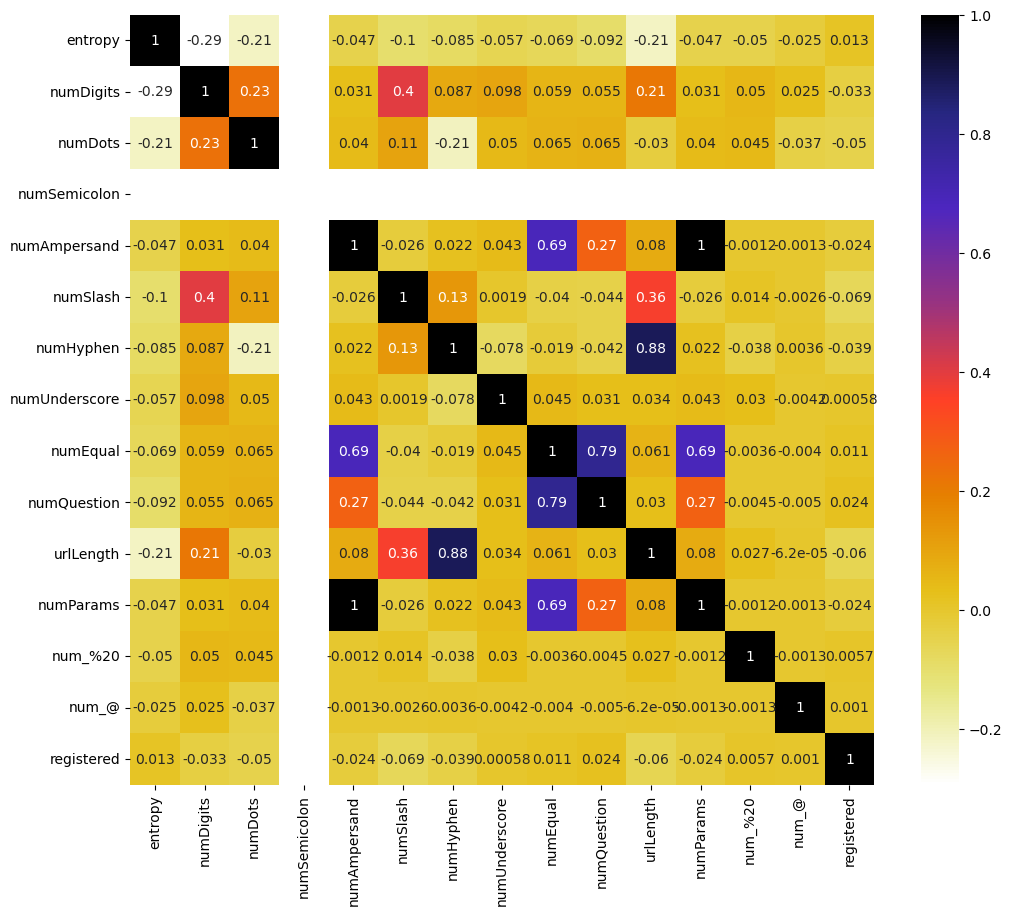

In [13]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [16]:
corr_features

{'numParams', 'numQuestion', 'urlLength'}

In [17]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,entropy,numDigits,numDots,numSemicolon,numAmpersand,numSlash,numHyphen,numUnderscore,numEqual,num_%20,num_@,registered
4574,0.608340,0.000000,0.142857,0,0.0,0.100000,0.148148,0.0,0.0,0.0,0,0.257143
7112,0.446416,0.096774,0.142857,0,0.0,0.111111,0.178571,0.0,0.0,0.0,0,0.428571
276,0.547436,0.160000,0.142857,0,0.0,0.500000,0.111111,0.0,0.0,0.0,0,0.257143
5416,0.358864,0.060000,0.142857,0,0.0,0.100000,0.185185,0.0,0.0,0.0,0,0.142857
7157,0.569022,0.193548,0.142857,0,0.0,0.666667,0.250000,0.0,0.0,0.0,0,0.342857
...,...,...,...,...,...,...,...,...,...,...,...,...
4658,0.434235,0.120000,0.285714,0,0.0,0.200000,0.333333,0.0,0.0,0.0,0,0.342857
2735,0.388774,0.220000,0.142857,0,0.0,0.400000,0.444444,0.0,0.0,0.0,0,0.114286
4425,0.360595,0.300000,0.428571,0,0.0,0.400000,0.222222,0.0,0.0,0.0,0,0.314286
1302,0.512040,0.120000,0.000000,0,0.0,0.000000,0.518519,0.0,0.0,0.0,0,0.057143
